# M2 Analysis

- Add metadata to Anndata and subset to same cells as Debbie


In [1]:
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, "/Users/smgroves/Documents/GitHub/Groves-CellSys2021/")
import mazebox as mb

In [78]:
adata = sc.read_h5ad('../data/M2/adata_01.h5ad')

In [79]:
adata

AnnData object with n_obs × n_vars = 5165 × 15728
    obs: 'doublet_scores', 'predicted_doublets', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'M', 'E', 'clusters_gradients', 'S_score', 'G2M_score', 'phase', 'cell_cycle_diff', 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'dropkick_coef', 'mito', 'pct_dropout_by_counts', 'ambient'
    uns: 'clusters_gradients_colors', 'dropkick_args', 'dropkick_thresholds', 'neighbors', 'pca', 'phase_colors', 'predicted_doublets_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'raw_counts', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [5]:
meta = pd.read_csv("../metadata_final.csv", header = 0, index_col=0)

In [17]:
from collections import Counter

Counter([i.split('-')[1] for i in meta.index])

Counter({'1': 5060, '2': 4388})

In [25]:
meta_m2 = meta.loc[meta['sample'] == 2]

In [80]:
adata.obs['brcd'] = None

In [81]:
meta_m2['brcd'] = 0

In [82]:
for x in meta_m2.index:    
    for y in adata.obs.index:
        x_brcd = x.split('-')[0]
        y_brcd = y.split(':')[1][:-1]
        if x_brcd == y_brcd:
            meta_m2.loc[x,'brcd'] = x_brcd
            adata.obs.loc[y,'brcd'] = x_brcd


In [83]:
adata.obs

,doublet_scores,predicted_doublets,initial_size_spliced,initial_size_unspliced,initial_size,n_counts,M,E,clusters_gradients,S_score,G2M_score,phase,cell_cycle_diff,dropkick_score,dropkick_label,arcsinh_n_genes_by_counts,brcd
CellID,,,,,,,,,,,,,,,,,
gex_possorted_bam_1WGCZ:AAATGGCCATTGTCAGx,0.020408,False,728,2852,728.0,899.999939,-0.023509,-0.016567,E,-0.031664,0.070800,G2M,-0.102465,0.423933,False,7.004883,AAATGGCCATTGTCAG
gex_possorted_bam_1WGCZ:AACATTGTCTAGCGATx,0.033175,False,1521,5740,1521.0,899.408142,-0.025835,0.001678,E,-0.006757,-0.030665,G1,0.023908,0.464916,False,7.431300,AACATTGTCTAGCGAT
gex_possorted_bam_1WGCZ:AAAGGACGTAGACAAAx,0.098782,False,1221,4353,1221.0,899.262878,-0.031360,0.002192,E,-0.030586,-0.044247,G1,0.013661,0.591312,True,7.482119,AAAGGACGTAGACAAA
gex_possorted_bam_1WGCZ:AAAGCACCAATTGCGCx,0.030769,False,861,4208,861.0,899.999878,-0.016634,-0.006221,E,-0.028394,-0.001370,G1,-0.027025,0.408587,False,7.179309,AAAGCACCAATTGCGC
gex_possorted_bam_1WGCZ:AAACCAACAAGCTTATx,0.098782,False,1669,4995,1669.0,898.921448,0.002753,0.049891,E,0.004635,-0.004985,S,0.009620,0.452788,False,7.493318,AAACCAACAAGCTTAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gex_possorted_bam_1WGCZ:TTTGTTGGTCACTCGCx,0.012939,False,1445,3483,1445.0,899.377258,-0.018805,0.021560,E,0.028106,0.017290,S,0.010816,0.467109,False,7.494431,None
gex_possorted_bam_1WGCZ:TTTGTGGCATGGCCCAx,0.013699,False,957,1898,957.0,900.000000,0.047368,-0.018366,M,0.032688,0.008938,S,0.023751,0.385999,False,7.213769,TTTGTGGCATGGCCCA
gex_possorted_bam_1WGCZ:TTTGTGTTCGGCCATAx,0.047445,False,785,4144,785.0,899.999939,-0.024466,0.003345,E,0.046011,0.015385,S,0.030627,0.441555,False,7.054450,TTTGTGTTCGGCCATA


In [84]:
meta_m2

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ATAC,nFeature_ATAC,nucleosome_signal,nucleosome_percentile,TSS.enrichment,TSS.percentile,barcode,...,NE_score1,identity,non.NE_score1,comb.score,S.Score,G2M.Score,Phase,old.ident,wsnn_res.0.5,brcd
AAACAGCCACAGGGAC-2,SeuratProject,760,429,5214,2440,0.474255,0.03,9.331652,0.86,AAACAGCCACAGGGAC,...,0.939053,NE_3,-0.219722,1.158775,0.039616,-0.015865,S,NE_3,3,AAACAGCCACAGGGAC
AAACAGCCATGCATAT-2,SeuratProject,1771,1091,11431,5175,0.630870,0.46,7.916915,0.65,AAACAGCCATGCATAT,...,0.518453,NE_1,-0.166355,0.684809,0.020608,0.007212,S,NE_1,1,AAACAGCCATGCATAT
AAACATGCAAGGTAAC-2,SeuratProject,3891,1882,9379,4276,0.538420,0.12,7.765788,0.61,AAACATGCAAGGTAAC,...,0.760558,NE_4,-0.055452,0.816010,0.052821,-0.150962,S,NE_4,4,AAACATGCAAGGTAAC
AAACATGCACCTAAGC-2,SeuratProject,1505,830,9671,4614,0.657321,0.57,7.209584,0.46,AAACATGCACCTAAGC,...,-0.464544,NE_1,-0.166355,-0.298189,-0.074430,-0.065865,G1,NE_1,1,AAACATGCACCTAAGC
AAACATGCAGCCTAAC-2,SeuratProject,4147,1941,9218,4315,0.593595,0.30,7.786950,0.62,AAACATGCAGCCTAAC,...,0.150137,NE_7,0.665421,-0.515285,0.007803,-0.252885,S,NE_6,8,AAACATGCAGCCTAAC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGAAGTAAACCC-2,SeuratProject,4762,2105,19567,8201,0.552869,0.15,8.510162,0.77,TTTGTGAAGTAAACCC,...,0.850080,NE_1,-0.166355,1.016435,-0.195078,-0.295192,G1,NE_1,1,TTTGTGAAGTAAACCC
TTTGTGGCATGGCCCA-2,SeuratProject,2343,1406,10727,4826,0.500000,0.05,8.207792,0.71,TTTGTGGCATGGCCCA,...,-0.606037,NE_2,-0.194081,-0.411956,-0.079232,-0.091346,G1,NE_2,2,TTTGTGGCATGGCCCA
TTTGTGTTCCTTAGGG-2,SeuratProject,792,526,15868,7329,0.677008,0.65,3.640634,0.01,TTTGTGTTCCTTAGGG,...,0.828149,NE_3,-0.043944,0.872094,-0.054622,0.012500,G2M,NE_3,3,TTTGTGTTCCTTAGGG
TTTGTGTTCGGCCATA-2,SeuratProject,4272,1860,5745,2730,0.523573,0.09,8.322113,0.73,TTTGTGTTCGGCCATA,...,-0.536215,NE_2,-0.210300,-0.325915,0.131853,-0.259135,S,NE_1,2,TTTGTGTTCGGCCATA


In [85]:
new_adata_obs = adata.obs.merge(meta_m2, how = 'left',on='brcd')


In [89]:
new_adata_obs.index = adata.obs.index

In [90]:
adata.obs = new_adata_obs

In [91]:
adata.obs

,doublet_scores,predicted_doublets,initial_size_spliced,initial_size_unspliced,initial_size,n_counts,M,E,clusters_gradients,S_score,...,nFeature_gene_activity,NE_score1,identity,non.NE_score1,comb.score,S.Score,G2M.Score,Phase,old.ident,wsnn_res.0.5
CellID,,,,,,,,,,,,,,,,,,,,,
gex_possorted_bam_1WGCZ:AAATGGCCATTGTCAGx,0.020408,False,728,2852,728.0,899.999939,-0.023509,-0.016567,E,-0.031664,...,1277.0,0.173151,NE_1,-0.194081,0.367232,-0.143858,0.171154,G2M,NE_3,1.0
gex_possorted_bam_1WGCZ:AACATTGTCTAGCGATx,0.033175,False,1521,5740,1521.0,899.408142,-0.025835,0.001678,E,-0.006757,...,1630.0,-0.436188,Club cells_2,1.132050,-1.568238,-0.333934,-0.312981,G1,AT2 cells,7.0
gex_possorted_bam_1WGCZ:AAAGGACGTAGACAAAx,0.098782,False,1221,4353,1221.0,899.262878,-0.031360,0.002192,E,-0.030586,...,3996.0,-0.514336,NE_7,0.971490,-1.485826,-0.216887,-0.329327,G1,NE_6,8.0
gex_possorted_bam_1WGCZ:AAAGCACCAATTGCGCx,0.030769,False,861,4208,861.0,899.999878,-0.016634,-0.006221,E,-0.028394,...,1020.0,0.087844,NE_4,-0.027726,0.115570,-0.138455,-0.147596,G1,NE_4,4.0
gex_possorted_bam_1WGCZ:AAACCAACAAGCTTATx,0.098782,False,1669,4995,1669.0,898.921448,0.002753,0.049891,E,0.004635,...,2592.0,-0.586325,AT2 cells,-0.290896,-0.295429,-0.158463,-0.419712,G1,Club cells_1,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gex_possorted_bam_1WGCZ:TTTGTTGGTCACTCGCx,0.012939,False,1445,3483,1445.0,899.377258,-0.018805,0.021560,E,0.028106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gex_possorted_bam_1WGCZ:TTTGTGGCATGGCCCAx,0.013699,False,957,1898,957.0,900.000000,0.047368,-0.018366,M,0.032688,...,3792.0,-0.606037,NE_2,-0.194081,-0.411956,-0.079232,-0.091346,G1,NE_2,2.0
gex_possorted_bam_1WGCZ:TTTGTGTTCGGCCATAx,0.047445,False,785,4144,785.0,899.999939,-0.024466,0.003345,E,0.046011,...,2306.0,-0.536215,NE_2,-0.210300,-0.325915,0.131853,-0.259135,S,NE_1,2.0


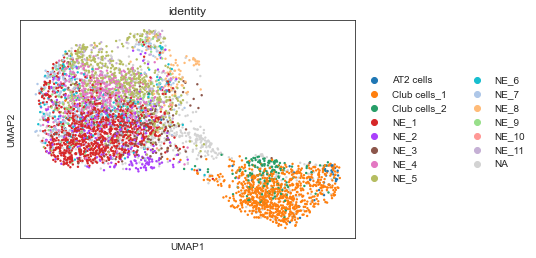

In [96]:
sc.pl.umap(adata, color = 'identity')

In [98]:
adata.write_h5ad('../data/M2/adata_01_filtered.h5ad')

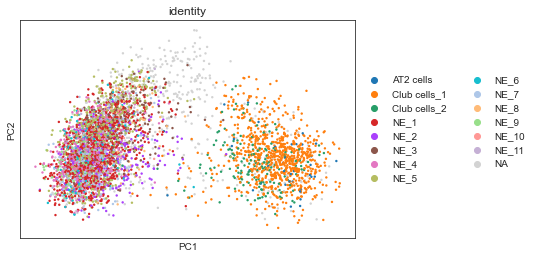

In [99]:
sc.pl.pca(adata, color = 'identity')